# Cancer Mortality Dataset 1980 - 2014

**Reason for Visualization**: The rate at which cancer kills has changed as treatment improves along with changes in lifestyle. Observing these changes will bring to light some interesting geographical trends. This is also an opportunity to improve my ability to visualize data, especially geographical data for better understanding and presentation.

In [361]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from highcharts import Highmap

import json

In [323]:
# Read in Mortality csv as dataframe
df = pd.read_csv("mort.csv", na_values=[' '])

**Further Analysis: ** The Institute for Health Metrics and Evaluation provided this data and there are multiple areas categories provided (http://ghdx.healthdata.org/record/united-states-mortality-rates-county-1980-2014). I will be only looking into the "Neoplasm" or cancer related mortality rates from 1980-2014.

In [324]:
# Only observe Neoplasm(Cancer) related mortality
cancer = df.loc[df['Category'] == 'Neoplasms']
print list(cancer.columns.values)

['Location', 'FIPS', 'Category', 'Mortality Rate, 1980*', 'Mortality Rate, 1980* (Min)', 'Mortality Rate, 1980* (Max)', 'Mortality Rate, 1985*', 'Mortality Rate, 1985* (Min)', 'Mortality Rate, 1985* (Max)', 'Mortality Rate, 1990*', 'Mortality Rate, 1990* (Min)', 'Mortality Rate, 1990* (Max)', 'Mortality Rate, 1995*', 'Mortality Rate, 1995* (Min)', 'Mortality Rate, 1995* (Max)', 'Mortality Rate, 2000*', 'Mortality Rate, 2000* (Min)', 'Mortality Rate, 2000* (Max)', 'Mortality Rate, 2005*', 'Mortality Rate, 2005* (Min)', 'Mortality Rate, 2005* (Max)', 'Mortality Rate, 2010*', 'Mortality Rate, 2010* (Min)', 'Mortality Rate, 2010* (Max)', 'Mortality Rate, 2014*', 'Mortality Rate, 2014* (Min)', 'Mortality Rate, 2014* (Max)', '% Change in Mortality Rate, 1980-2014', '% Change in Mortality Rate, 1980-2014 (Min)', '% Change in Mortality Rate, 1980-2014 (Max)']


In [325]:
# Convert the float FIPS value into a padded string value usable by highmap lib
def converter(x):
    return x['FIPS'].astype(int).astype(str).zfill(5)

visualize = cancer[['FIPS','% Change in Mortality Rate, 1980-2014']]

# Remove NaN FIPS values
visualize = visualize[np.isfinite(visualize['FIPS'])]
counties = visualize[visualize['FIPS'] > 56]


In [326]:
state_level = (
    cancer.loc[
        cancer[
            'Location'
        ].isin(
            [
                'Alabama',
                'Alaska', 
                'Arizona', 
                'Arkansas', 
                'California', 
                'Colorado', 
                'Connecticut', 
                'Delaware', 
                'Florida', 
                'Georgia', 
                'Hawaii', 
                'Idaho', 
                'Illinois', 
                'Indiana',
                'Iowa', 
                'Kansas', 
                'Kentucky', 
                'Louisiana',
                'Maine', 
                'Maryland', 
                'Massachusetts', 
                'Michigan', 
                'Minnesota', 
                'Mississippi', 
                'Missouri', 
                'Montana Nebraska',
                'Nevada', 
                'New Hampshire', 
                'New Jersey', 
                'New Mexico', 
                'New York', 
                'North Carolina', 
                'North Dakota', 
                'Ohio', 
                'Oklahoma', 
                'Oregon', 
                'Pennsylvania',
                'Rhode Island', 
                'South Carolina', 
                'South Dakota', 
                'Tennessee', 
                'Texas', 
                'Utah', 
                'Vermont', 
                'Virginia', 
                'Washington', 
                'West Virginia', 
                'Wisconsin', 
                'Wyomin',
            ]
        )
    ]
)

In [327]:
state_level = state_level.drop([
        'Mortality Rate, 1980* (Min)',
        'Mortality Rate, 1980* (Max)',
        'Mortality Rate, 1985* (Min)',
        'Mortality Rate, 1985* (Max)',
        'Mortality Rate, 1990* (Min)',
        'Mortality Rate, 1990* (Max)',
        'Mortality Rate, 1995* (Min)',
        'Mortality Rate, 1995* (Max)',
        'Mortality Rate, 2000* (Min)',
        'Mortality Rate, 2000* (Max)',
        'Mortality Rate, 2005* (Min)',
        'Mortality Rate, 2005* (Max)',
        'Mortality Rate, 2010* (Min)',
        'Mortality Rate, 2010* (Max)',
        'Mortality Rate, 2014* (Max)',
        'Mortality Rate, 2014* (Min)',
        '% Change in Mortality Rate, 1980-2014 (Min)',
        '% Change in Mortality Rate, 1980-2014 (Max)',
        'Category',
        'FIPS'
    ],axis=1)

In [350]:
state_level.columns = [
    'state',
    '1980',
    '1985',
    '1990',
    '1995',
    '2000',
    '2005',
    '2010',
    '2014',
    'change'
]

In [360]:
# Let's grab the states with the highest decrease in cancer mortality rates and 
# highest increase in cancer mortality rates
increased_state = state_level.loc[state_level['change'].argmax(),'state']
increased_per = state_level['change'].max()
decreased_state = state_level.loc[state_level['change'].argmin(),'state']
increased_per=  state_level['change'].min()

In [352]:
state_level_yearly = state_level.drop([
        'change'
    ],axis=1)
state_level_yearly.head()

,state,1980,1985,1990,1995,2000,2005,2010,2014
57493,Alabama,252.60,252.43,253.15,257.15,248.60,240.58,229.62,230.98
57561,Alaska,246.42,237.36,233.01,232.42,218.97,204.36,193.52,194.76
57591,Arizona,214.67,208.52,206.56,200.63,192.43,182.52,170.68,170.27
57607,Arkansas,250.20,249.30,248.18,250.18,239.25,230.42,218.79,219.87
57683,California,231.47,226.35,216.08,212.05,195.47,182.78,168.84,165.36


In [353]:
# state_level_yearly.set_index([""])

state_t = state_level_yearly.T.reset_index().drop(0)
state_t.head()
state_t.columns = [
    'year',
    'Alabama',
    'Alaska',
    'Arizona',
    'Arkansas',
    'California',
    'Colorado',
    'Connecticut',
    'Delaware',
    'Florida',
    'Georgia',
    'Hawaii',
    'Idaho',
    'Illinois',
    'Indiana',
    'Iowa',
    'Kansas',
    'Kentucky',
    'Louisiana',
    'Maine',
    'Maryland',
    'Massachusetts',
    'Michigan',
    'Minnesota',
    'Mississippi',
    'Missouri',
    'Nevada',
    'New Hampshire',
    'New Jersey',
    'New Mexico',
    'New York',
    'North Carolina',
    'North Dakota',
    'Ohio',
    'Oklahoma',
    'Oregon',
    'Pennsylvania',
    'Rhode Island',
    'South Carolina',
    'South Dakota',
    'Tennessee',
    'Texas',
    'Utah',
    'Vermont',
    'Virginia',
    'Washington',
    'West Virginia',
    'Wisconsin'
]

state_t.head()


,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
1,1980,252.6,246.42,214.67,250.2,231.47,195.21,249.52,270.11,232.02,...,237.45,212.7,238.64,232.94,169.24,238.13,251.98,218.46,243.44,220.11
2,1985,252.43,237.36,208.52,249.3,226.35,192.17,241.76,264.95,227.96,...,236.89,213.37,239.67,229.82,168.73,233.63,247.29,217.76,247.06,218.9
3,1990,253.15,233.01,206.56,248.18,216.08,193.97,230.07,256.17,222.7,...,237.2,211.13,240.43,227.06,168.09,228.32,240.74,213.54,249.82,217.75
4,1995,257.15,232.42,200.63,250.18,212.05,192.66,227.76,250.85,221.7,...,239.75,213.92,244.89,224.92,171.66,227.43,239.73,214.37,255.49,218.47
5,2000,248.6,218.97,192.43,239.25,195.47,182.69,211.7,232.52,208.37,...,230.86,204.96,237.53,211.71,165.21,214.07,226.24,204.74,248.36,209.7


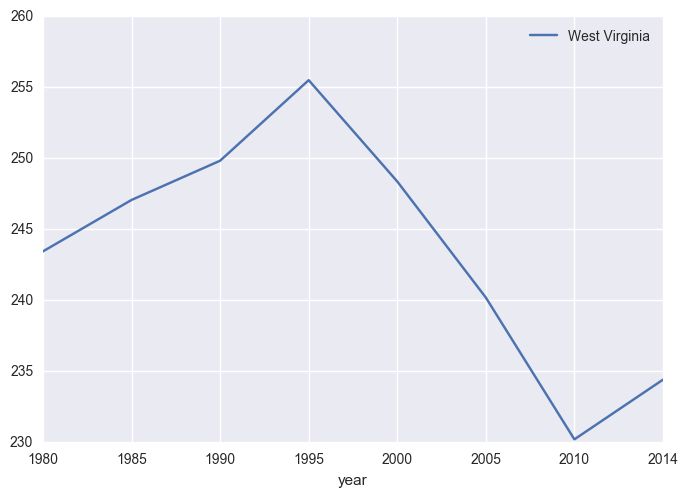

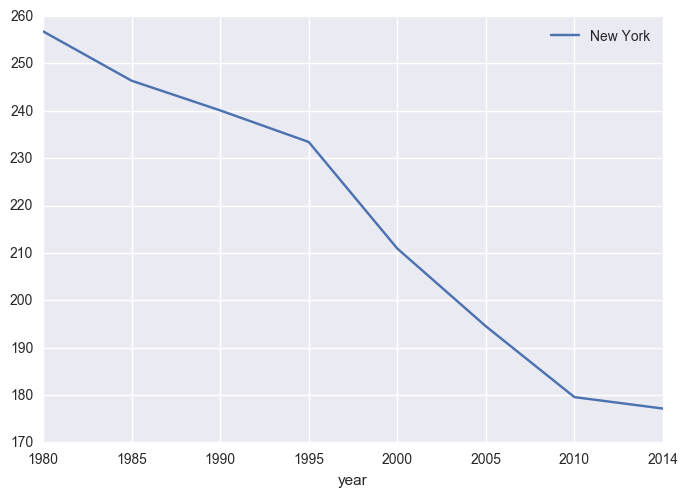

In [363]:
plot = state_t.plot('year',increased_state)
plot = state_t.plot('year',decreased_state)
# plot.plot()
# plt.plot(state_t[increased_state], <Y AXIS VALUES HERE>, 'line type', label='label here')

In [207]:
# Counties - Set up variance and step sizes for future color selection
C_maximum = counties['% Change in Mortality Rate, 1980-2014'].max()
C_minimum = counties['% Change in Mortality Rate, 1980-2014'].min()

print C_maximum
print C_minimum

# 'Mortality Rate, 1980*', 'Mortality Rate, 1985*', 'Mortality Rate, 1990*',  'Mortality Rate, 1995*', 'Mortality Rate, 2000*', 'Mortality Rate, 2005*', 'Mortality Rate, 2010*', 'Mortality Rate, 2014*'

C_variance = C_maximum - C_minimum

C_step = C_variance/6

45.63
-57.49


In [208]:
# Counties - Trim down to usable list of dicts
counties.loc[:,'FIPS'] = counties.apply(converter, axis=1)

counties.columns = ['code', 'value']
counties = counties.T.to_dict().values()

In [210]:
C = Highmap(width = 800, height = 700)

# Read in county options
with open('county_map_options.json', 'r') as f:
     C_options = json.load(f)


C.set_dict_options(C_options) # set options
C.add_data_set(counties, 'map', 'Change in Mortality', joinBy=['fips', 'code'])

C.set_map_source('http://code.highcharts.com/mapdata/countries/us/us-all-all.js', jsonp_map=False)

C


**Observations:** From 1980 - 2014, in most counties(boroughs/parishes) of the United States, a negative trend of cancer mortality can be observed. The largest decrease in cancer mortality can be seen in the Alaskan Borough of Aleutians East/West with a *decrease* of **57.49%**. The largest increase in cancer mortality can be seen in the Kentucky County of Owsley with an *increase* of **45.6%**. There appears to be a geographical correlation with an increase/decrease in cancer mortality over the past three and one half decades.

**Setup:** I saved the options to this highmap display separately into a json file and read it in each time it is displayed. This allows me to keep a large chunk of options separate from the functionality of visualizing the data. The color scheme steps were generated automatically by finding the variance between maximal change and minimal change and creating a series of six steps. Color Brewer: http://colorbrewer2.org/ was used to create the color scheme of the map.

**Credit:** I found that using this interactive map was quite useful for geographical data exploration. It is made possible by the javascript library: http://www.highcharts.com/ and the python implementation: https://github.com/kyper-data/python-highcharts.